# Football Data Analysis Toolkit - Examples

In [1]:
%matplotlib inline
import footballdata as foo
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# plt.rcParams['figure.figsize'] = (16.0, 12.0)
# plt.style.use('ggplot')

## FiveThirtyEight

In [2]:
five38 = foo.FiveThirtyEight()

In [3]:
print(five38.__doc__)

 Provides pandas.DataFrames from the fivethirtyeight.com project
    "2016-17 Club Soccer Predictions"

    Data will be downloaded as necessary and cached locally in ./data

    Original project and background info:
    https://projects.fivethirtyeight.com/soccer-predictions/
    https://fivethirtyeight.com/features/how-our-club-soccer-projections-work/

    Source JSON:
    https://projects.fivethirtyeight.com/soccer-predictions/data.json

    Parameters
    ----------
    league_ids : string or iterable of league-ids to include, None for all
    


In [4]:
pd.DataFrame

pandas.core.frame.DataFrame

### Leagues

In [5]:
five38.league_ids

['bundesliga',
 'champions-league',
 'la-liga',
 'liga-mx',
 'ligue-1',
 'mls',
 'nwsl',
 'premier-league',
 'serie-a']

In [6]:
leagues = five38.leagues()
leagues

,champions,league_id,longName,relegated,teams
league,,,,,
bundesliga,4,1845,Bundesliga,2,18
champions-league,0,1818,Champions League,0,32
la-liga,4,1869,La Liga,3,20
liga-mx,4,1975,Liga MX,1,18
ligue-1,3,1843,Ligue 1,2,20
mls,3,1951,MLS,0,22
nwsl,0,4582,NWSL,0,10
premier-league,4,2411,Premier League,3,20
serie-a,3,1854,Serie A,3,20


In [7]:
five38.league_ids = ['la-liga', 'premier-league']
df_leagues = five38.leagues()
df_leagues

,champions,league_id,longName,relegated,teams
league,,,,,
la-liga,4,1869,La Liga,3,20
premier-league,4,2411,Premier League,3,20


### Game predictions and results

In [8]:
games = five38.games()
games.head()

adj_score1  adj_score2  \
league  datetime            id                                  
la-liga 2016-08-19 18:45:00 400894015       1.050        1.05   
        2016-08-19 20:00:00 400894018       2.100        1.05   
        2016-08-20 16:15:00 400894012       6.008        2.10   
        2016-08-20 18:15:00 400893989       1.050        1.05   
        2016-08-20 20:15:00 400894017       6.214        4.20   

                                      aggregate_winner  chances1  chances2  \
league  datetime            id                                               
la-liga 2016-08-19 18:45:00 400894015             None     0.917     0.811   
        2016-08-19 20:00:00 400894018             None     1.704     0.328   
        2016-08-20 16:15:00 400894012             None     3.859     0.262   
        2016-08-20 18:15:00 400893989             None     0.810     1.791   
        2016-08-20 20:15:00 400894017             None     2.518     1.783   

                                        leg  moves1  moves2   prob1   prob2  \
league  datetime            id                                                
la-liga 2016-08-19 18:45:00 400894015  None   1.398   0.690  0.5475  0.1897   
        2016-08-19 20:00:00 400894018  None   0.478   0.809  0.5003  0.2260   
        2016-08-20 16:15:00 400894012  None   5.294   0.337  0.9591  0.0071   
        2016-08-20 18:15:00 400893989  None   0.822   1.032  0.3194  0.3917   
        2016-08-20 20:15:00 400894017  None   2.326   0.750  0.5952  0.1760   

                                           ...       shootout_winner status  \
league  datetime            id             ...                                
la-liga 2016-08-19 18:45:00 400894015      ...                  None   post   
        2016-08-19 20:00:00 400894018      ...                  None   post   
        2016-08-20 16:15:00 400894012      ...                  None   post   
        2016-08-20 18:15:00 400893989      ...                  None   post   
        2016-08-20 20:15:00 400894017      ...                  None   post   

                                                     team1  team1_code  \
league  datetime            id                                           
la-liga 2016-08-19 18:45:00 400894015               Málaga         MGA   
        2016-08-19 20:00:00 400894018  Deportivo La Coruña         DEP   
        2016-08-20 16:15:00 400894012            Barcelona         BAR   
        2016-08-20 18:15:00 400893989              Granada         GRN   
        2016-08-20 20:15:00 400894017           Sevilla FC         SEV   

                                      team1_id team1_sdr_id       team2  \
league  datetime            id                                            
la-liga 2016-08-19 18:45:00 400894015       99        74004     Osasuna   
        2016-08-19 20:00:00 400894018       90        74022       Eibar   
        2016-08-20 16:15:00 400894012       83        74014  Real Betis   
        2016-08-20 18:15:00 400893989     3747        74005  Villarreal   
        2016-08-20 20:15:00 400894017      243        93401    Espanyol   

                                      team2_code  team2_id  team2_sdr_id  
league  datetime            id                                            
la-liga 2016-08-19 18:45:00 400894015        OSA        97         74015  
        2016-08-19 20:00:00 400894018        EIB      3752         73965  
        2016-08-20 16:15:00 400894012        BET       244         74025  
        2016-08-20 18:15:00 400893989        VLR       102         74019  
        2016-08-20 20:15:00 400894017        ESP        88         74018  

[5 rows x 24 columns]

### League position forecasts by team, including history

In [9]:
forecasts = five38.forecasts()
forecasts.head()

code  current_losses  \
league  last_updated        name                                   
la-liga 2016-08-18 14:00:00 Alavés           ALA               0   
                            Athletic Bilbao  BIL               0   
                            Atletico Madrid  ATL               0   
                            Barcelona        BAR               0   
                            Celta Vigo       VIG               0   

                                             current_ties  current_wins  \
league  last_updated        name                                          
la-liga 2016-08-18 14:00:00 Alavés                      0             0   
                            Athletic Bilbao             0             0   
                            Atletico Madrid             0             0   
                            Barcelona                   0             0   
                            Celta Vigo                  0             0   

                                             d_rating  goal_diff  \
league  last_updated        name                                   
la-liga 2016-08-18 14:00:00 Alavés            1.29658   -20.5007   
                            Athletic Bilbao   0.98432    -0.9131   
                            Atletico Madrid   0.61564    31.3052   
                            Barcelona         0.65523    75.8026   
                            Celta Vigo        1.12691    -7.6691   

                                             goals_against  goals_scored  \
league  last_updated        name                                           
la-liga 2016-08-18 14:00:00 Alavés                 58.0649       37.5642   
                            Athletic Bilbao        47.7403       46.8272   
                            Atletico Madrid        29.1405       60.4457   
                            Barcelona              26.7882      102.5908   
                            Celta Vigo             52.8428       45.1737   

                                            group    id   ...     position_5  \
league  last_updated        name                          ...                  
la-liga 2016-08-18 14:00:00 Alavés           None    96   ...         0.0206   
                            Athletic Bilbao  None    93   ...         0.0810   
                            Atletico Madrid  None  1068   ...         0.1016   
                            Barcelona        None    83   ...         0.0057   
                            Celta Vigo       None    85   ...         0.0532   

                                             position_6  position_7  \
league  last_updated        name                                      
la-liga 2016-08-18 14:00:00 Alavés               0.0268      0.0309   
                            Athletic Bilbao      0.0780      0.0767   
                            Atletico Madrid      0.0627      0.0444   
                            Barcelona            0.0031      0.0011   
                            Celta Vigo           0.0620      0.0659   

                                             position_8  position_9  \
league  last_updated        name                                      
la-liga 2016-08-18 14:00:00 Alavés               0.0385      0.0434   
                            Athletic Bilbao      0.0718      0.0675   
                            Atletico Madrid      0.0329      0.0216   
                            Barcelona            0.0008      0.0005   
                            Celta Vigo           0.0633      0.0669   

                                             relegated  sdr_id    ties  \
league  last_updated        name                                         
la-liga 2016-08-18 14:00:00 Alavés              0.3021   74003  9.5713   
                            Athletic Bilbao     0.0888   74011  9.7752   
                            Atletico Madrid     0.0027   74010  9.2438   
                            Barcelona           0.0000   74014  5.2603   
                            Ce

In [10]:
forecasts.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 44 columns):
league            1440 non-null object
last_updated      1440 non-null datetime64[ns]
name              1440 non-null object
code              1440 non-null object
current_losses    1440 non-null int64
current_ties      1440 non-null int64
current_wins      1440 non-null int64
d_rating          1440 non-null float64
goal_diff         1440 non-null float64
goals_against     1440 non-null float64
goals_scored      1440 non-null float64
group             0 non-null object
id                1440 non-null int64
losses            1440 non-null float64
make_champs       1440 non-null float64
make_europa       1440 non-null float64
o_rating          1440 non-null float64
position_1        1440 non-null float64
position_10       1440 non-null float64
position_11       1440 non-null float64
position_12       1440 non-null float64
position_13       1440 non-null float64
position_14       144

#### The most unbalanced league

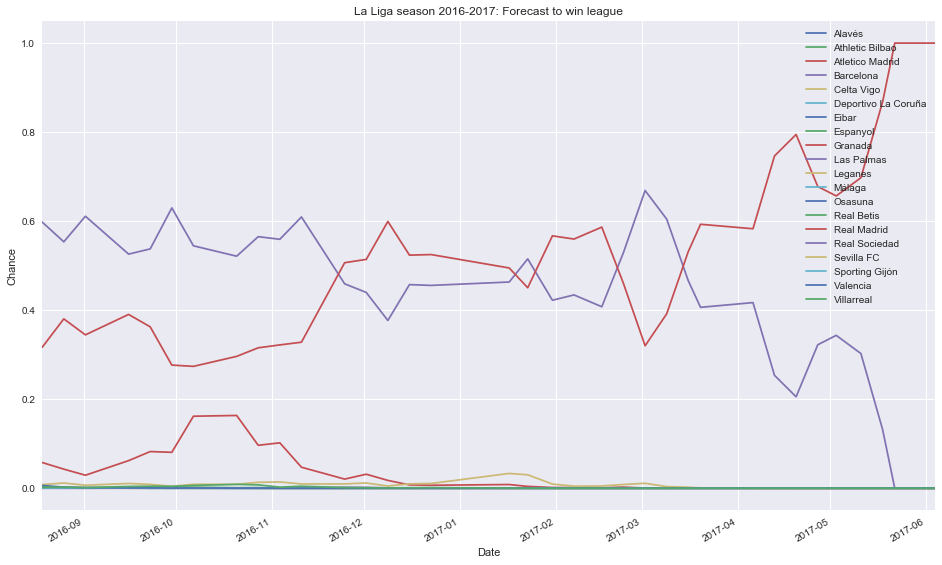

In [11]:
la_liga_win_contenders = (forecasts
    .loc['la-liga']
    .reset_index()
    .pivot(index='last_updated', columns='name', values='win_league')
    .sort_index()
    )
ax = la_liga_win_contenders.plot(figsize=(16,10))
ax.set_title('La Liga season 2016-2017: Forecast to win league')
ax.set_xlabel('Date')
ax.set_ylabel('Chance')
ax.legend();

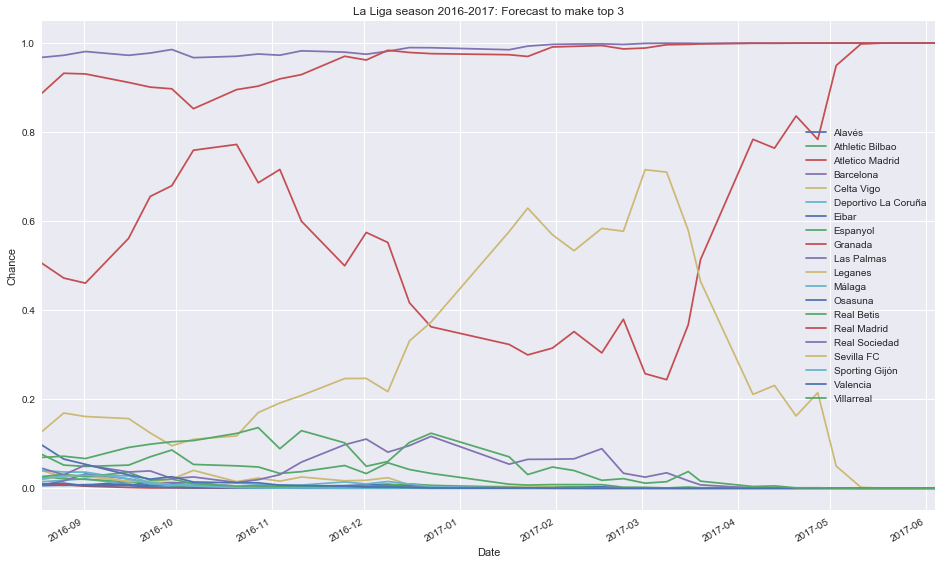

In [12]:
la_liga_top3_contenders = (forecasts
    .loc['la-liga']
    .reset_index()
    .assign(top3_chance=lambda x: x.position_1 + x.position_2 + x.position_3)
    .pivot(index='last_updated', columns='name', values='top3_chance')
    .sort_index()
    )
ax = la_liga_top3_contenders.plot(figsize=(16,10))
ax.set_title('La Liga season 2016-2017: Forecast to make top 3')
ax.set_xlabel('Date')
ax.set_ylabel('Chance')
ax.legend();

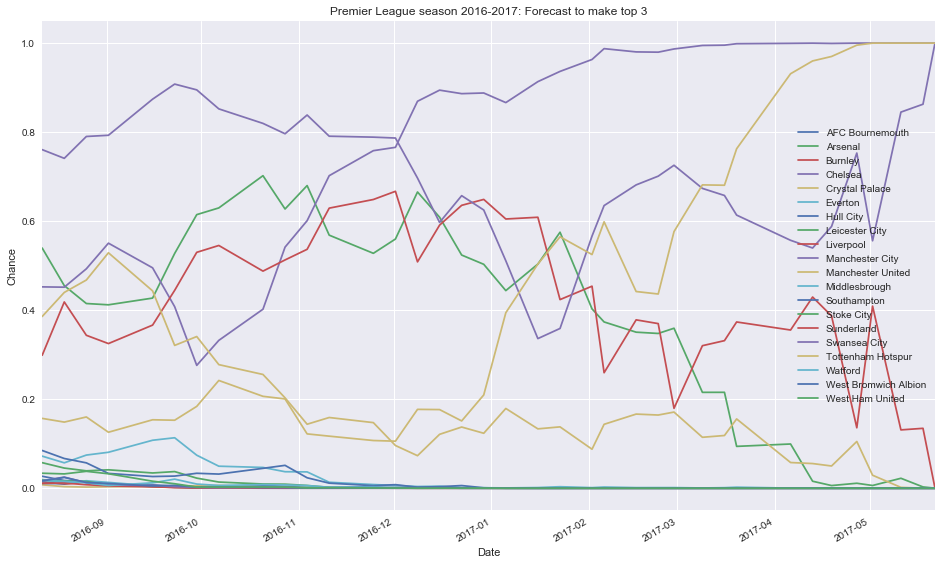

In [13]:
epl_top3_contenders = (forecasts
    .loc['premier-league']
    .reset_index()
    .assign(top3_chance=lambda x: x.position_1 + x.position_2 + x.position_3)
    .pivot(index='last_updated', columns='name', values='top3_chance')
    .sort_index()
    )

ax = epl_top3_contenders.plot(figsize=(16,10))
ax.set_title('Premier League season 2016-2017: Forecast to make top 3')
ax.set_xlabel('Date')
ax.set_ylabel('Chance')
ax.legend();

### Clinches

In [14]:
clinches = five38.clinches()
clinches.head()

league_id  team_id               typ
league  date                                            
la-liga 2017-02-26       1869       97   win_league_elim
        2017-03-01       1869       97  make_champs_elim
        2017-03-01       1869     3788   win_league_elim
        2017-03-04       1869       83    relegated_elim
        2017-03-04       1869     3747   win_league_elim